In [7]:
"""
Vector arithmetic
Code from Chapter 4 of Data Science from Scratch
"""
import math
from functools import reduce


# Implement vector arithmetic. It's "from scratch".
# Joel represents vectors as Python lists. Would tuples be more natural?

def vector_add(v, w):
    """
    add vectors element-wise
    """
    return [v_i + w_i for v_i,w_i in zip(v,w)]

def vector_subtract(v, w):
    """
    subtract vectors element-wise
    """
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    """
    sum multiple vectors
    """
    return reduce(vector_add, vectors)

def vector_sum_by_zip(vectors):
    """
    sum multiple vectors, but uglier and slower as the number of vectors increase.
    """
    return [sum(v_is) for v_is in zip(*vectors)]

def scalar_multiply(c, v):
    """
    multiple a vector v by a scalar c
    """
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    """compute the vector whose ith element is the mean of the ith elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    """
    dot product of v and w
    """
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    """(v_1 - w_1) ** 2 + ... + (v_n - w_n) ** 2"""
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return magnitude(vector_subtract(v, w))
    # equivalent to
    # return math.sqrt(squared_distance(v, w))

In [9]:
"""
Matrix
Code from Chapter 4 of Data Science from Scratch
"""
import math

def rows(A):
    return len(A)

def cols(A):
    return A.shape[1] if hasattr(A, 'shape') else (len(A[0]) if A else 0)

def shape(A):
    return rows(A), cols(A)

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

def make_matrix(num_rows, num_cols, fn):
    """
    returns a num_rows x num_cols matrix
    whose (i,j)th entry is fn(i, j)
    """
    return [[fn(i, j) for j in range(num_cols)] for i in range(num_rows)]

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

def identity(n):
    return make_matrix(n, n, is_diagonal)

def matrix_multiply(A, B):
    if cols(A) != rows(B):
        raise RuntimeError("Can't multiply matrices with dimensions {} and {}".format(
            shape(A), shape(B)))

    return [[dot(row,col) for col in zip(*B)] for row in A]

In [12]:
"""
Stats
Code from Chapter 5 of Data Science from Scratch
"""
import math
from collections import Counter

def find_bin(x, breaks):
    """
    Return an integer indicating which 'bucket' x falls into. Buckets are
    intervals that divide the space of real numbers such that:
    [-inf, breaks_0), [breaks_0, breaks_1), [breaks_1, ..., breaks_n), [breaks_n,+inf]
    All buckets are closed on their lower bound. All buckets except the last
    are open on their upper bound.
    For examples, breaks=[10, 20] creates three buckets: numbers less than 10,
    numbers in [10, 20) and numbers >= 20.
    """
    i = len(breaks)
    while i > 0 and x < breaks[i-1]:
        i -= 1
    return i


def bin(xs, breaks):
    return [find_bin(x, breaks) for x in xs]


def hist(xs, breaks):
    return Counter(bin(xs, breaks))


def mean(x):
    return sum(x) / len(x)


def median(v):
    """finds the 'middle-most' value of v"""
    sorted_v = sorted(v)
    n = len(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
            if count == max_count]

def de_mean(xs):
    mu = mean(xs)
    return ((x-mu) for x in xs)

def variance(xs):
    mu = mean(xs)
    n = len(xs)
    return sum((x-mu)**2 for x in xs) / (n-1)

def standard_deviation(xs):
    return math.sqrt(variance(xs))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n-1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero

In [13]:
"""
Gredient_Descent
"""
import math
import numpy as np
import random


def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

def partial_difference_quotient(f, v, i, epsilon=0.00001):
    """
    estimate partial derivative with respect to v_i of a function f at v
    """
    v0 = [(v_j-epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    v1 = [(v_j+epsilon) if j==i else v_j for j, v_j in enumerate(v)]
    return (f(v1) - f(v0)) / (2*epsilon)

def estimate_gradient(f, v, epsilon=0.00001):
    return [partial_difference_quotient(f, v, i, epsilon) for i, _ in enumerate(v)]

def step(v, direction, step_size):
    """
    move step_size in the direction from v
    """
    return [v_i + step_size * direction_i for v_i, direction_i in zip(v, direction)]

def distance(v, w):
    return math.sqrt(sum((vi-wi)**2 for vi, wi in zip(v,w)))

def safe(f):
    """
    return a new function that's the same as f, except that it outputs
    infinity whenever f produces an error
    """
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""
    
    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
    theta = theta_0
    target_fn = safe(target_fn)
    value = target_fn(theta)
    values = []
    
    # set theta to initial value
    # safe version of target_fn
    # value we're minimizing
    while True:
        values.append(value)
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            values.append(next_value)
            break
        else:
            theta, value = next_theta, next_value

    return theta, values

def est_gradient_sum_of_squares(v):
    return estimate_gradient(sum_of_squares, v)

def in_random_order(data):
    """generator that returns the elements of data in random order"""
    # create a list of indexes
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)

    # return the data in that order
    for i in indexes:
        yield data[i]

def vector_subtract(v, w):
    """subtracts corresponding elements"""
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """c is a number, v is a vector"""
    return [c * v_i for v_i in v]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    data = list(zip(x, y))
    
    # initial guess
    theta = theta_0
    
    # initial step size
    alpha = alpha_0
    
    # the minimum so far
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0

    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum(target_fn(x_i, y_i, theta) for x_i, y_i in data)

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))

    return min_theta

def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn),
                          negate_all(gradient_fn),
                          theta_0,
                          tolerance)

def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)

CHAPTER 10 Working with Data

In [14]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats
from collections import Counter

Histograms

In [15]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

In [16]:
def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

In [17]:
def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [18]:
data = np.random.randn(10000)

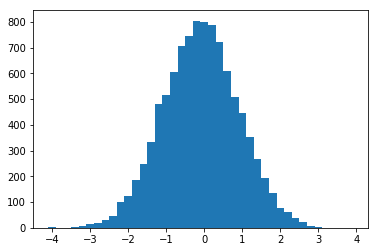

In [19]:
plot_histogram(data, 0.2)

In [20]:
n = 1000
xs = np.random.randn(n)

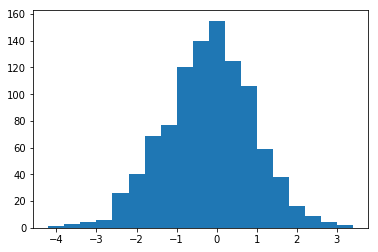

In [21]:
ys1 = xs + np.random.randn(n)/2
plot_histogram(ys1, 0.4)

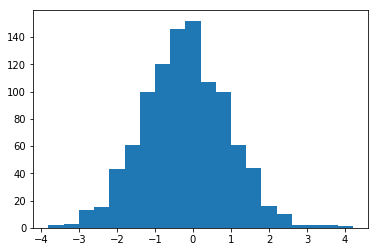

In [22]:
ys2 = -xs + np.random.randn(n)/2
plot_histogram(ys2, 0.4)

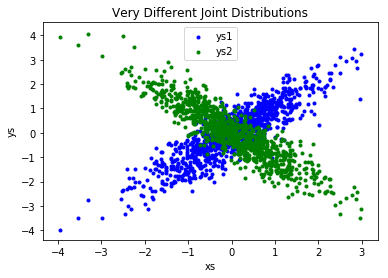

In [23]:
plt.scatter(xs, ys1, marker='.', color='blue', label='ys1')
plt.scatter(xs, ys2, marker='.', color='green',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

Correlation

In [24]:
correlation(xs, ys1)

0.8866433026924333

In [25]:
correlation(xs, ys2)

-0.8984224398223548

In [26]:
def correlation_matrix(data):
    """
    returns the num_columns x num_columns matrix whose (i, j)th
    entry is the correlation between columns i and j of data
    """
    _, num_columns = shape(data)
    
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

In [27]:
n = 1000
m = 20
data = np.random.randn(n,m)

In [28]:
A = np.array(correlation_matrix(data))

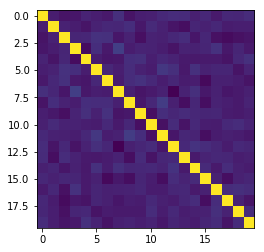

In [29]:
plt.imshow(A)
plt.show()

Create a matrix with randomly correlated columns

In [30]:
n = 1000
m = 20

In [31]:
means = [0] * m

In [32]:
A = np.array(scipy.stats.uniform().rvs(m*m)).reshape(m,m)
cov = A.T @ A
cov = cov-cov.min()
cov = cov/cov.max()
for i in range(m):
    cov[i,i] = 1.0

In [33]:
M = np.random.multivariate_normal(means, cov, n)

In [34]:
cor_matrix = np.array(correlation_matrix(M))

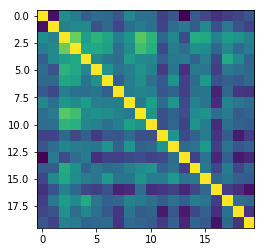

In [35]:
plt.imshow(cor_matrix)
plt.show()

In [36]:
correlation(M[:,12], M[:,19])

0.2944598281401967

Rescaling

In [37]:
def scale(data):
    num_rows, num_cols = shape(data)
    means = [mean(get_column(data, j)) for j in range(num_cols)]
    stdevs = [standard_deviation(get_column(data, j)) for j in range(num_cols)]
    return means, stdevs

In [38]:
def rescale(data):
    """
    rescales the input data so that each column has mean 0 and standard deviation 1
    leaves alone columns with no deviation
    """
    means, stdevs = scale(data)
    
    def rescaled(i, j):
        if stdevs[j] > 0:
            return (data[i][j] - means[j]) / stdevs[j]
        else:
            return data[i][j]

    num_rows, num_cols = shape(data)
    return make_matrix(num_rows, num_cols, rescaled)

In [39]:
n = 1000
letters = 'abcdefghijklmnopqrstuvwxyz'
params = list(zip(np.random.rand(10), np.random.rand(10)))

data = pd.DataFrame({letter:np.random.normal(mu, sigma, n)
                     for letter, (mu, sigma) in zip(letters, params)})

In [40]:
params

[(0.8931649952074773, 0.6295653651709695),
 (0.9716306506221195, 0.5786095077979347),
 (0.9269046795840584, 0.05947351798153755),
 (0.07364361132079789, 0.15766016257218962),
 (0.6379377713588134, 0.7944084743752213),
 (0.3502743668762591, 0.6687543891676289),
 (0.507160356042179, 0.04184400473590488),
 (0.8151595805743889, 0.70849419877177),
 (0.608454059533435, 0.3894475090612831),
 (0.7536689564774667, 0.26340602574011374)]

In [41]:
data.mean()

a    0.887296
b    0.979811
c    0.928321
d    0.067631
e    0.629794
f    0.382764
g    0.505304
h    0.800849
i    0.603456
j    0.745293
dtype: float64

In [44]:
def df_to_list(data):
    return [row.values.tolist() for i,row in data.iterrows()]

In [46]:
data = df_to_list(data)
shape(data)

(1000, 10)

In [47]:
scaled_data = rescale(data)

Check that means are close to zero and SDs are close to 1.

In [48]:
means, sds = scale(scaled_data)
assert all(abs(m - 0)<1e-12 for m in means)
assert all(abs(sd - 1)<1e-12 for sd in sds)

# Dimensionality reduction

In [49]:
def demean_matrix(A):
    """
    returns the result of subtracting from every value in A the mean value of its
    column. the resulting matrix has mean 0 in every column
    """
    nr, nc = shape(A)
    column_means, _ = scale(A)
    return make_matrix(nr, nc, lambda i, j: A[i][j] - column_means[j])

In [50]:
n = 100
A = [[x,y] for x,y in zip(np.random.randn(n) * 10, np.random.randn(n) * 3)]

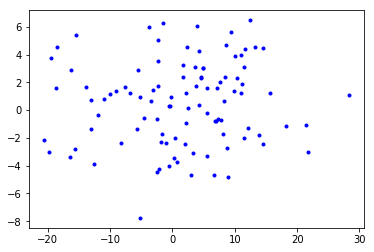

In [51]:
plt.scatter(get_column(A,0), get_column(A,1), marker='.', color='blue')
plt.show()

In [52]:
theta = - math.pi / 7
rotate = [[math.cos(theta), -math.sin(theta)],
          [math.sin(theta), math.cos(theta)]]

In [53]:
B = matrix_multiply(A, rotate)

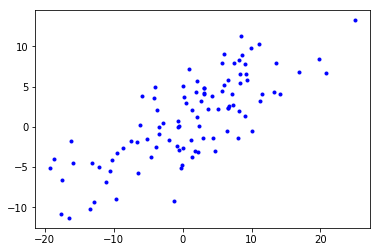

In [54]:
plt.scatter(get_column(B,0), get_column(B,1), marker='.', color='blue')
plt.show()

In [55]:
correlation(get_column(B,0), get_column(B,1))

0.7751875446941129

In [56]:
def direction(w):
    mag = magnitude(w)
    return [w_i / mag for w_i in w]

In [57]:
def directional_variance_i(x_i, w):
    """the variance of the row x_i in the direction determined by w"""
    return dot(x_i, direction(w)) ** 2

In [58]:
def directional_variance(X, w):
    """the variance of the data in the direction determined w"""
    return sum(directional_variance_i(x_i, w) for x_i in X)

In [60]:
def directional_variance_gradient_i(x_i, w):
    """the contribution of row x_i to the gradient of the direction-w variance"""
    projection_length = dot(x_i, direction(w))
    return [2 * projection_length * x_ij for x_ij in x_i]

In [61]:
def directional_variance_gradient(X, w):
    return vector_sum(directional_variance_gradient_i(x_i,w) for x_i in X)

In [63]:
def first_principal_component(X):
    guess = [1 for _ in X[0]]
    unscaled_maximizer, values = maximize_batch(
        partial(directional_variance, X), # is now a function of w
        partial(directional_variance_gradient, X), # is now a function of w
        guess)
    return direction(unscaled_maximizer)

In [65]:
pc1 = first_principal_component(B)
pc1

[0.8870329671692456, 0.4617060917455217]

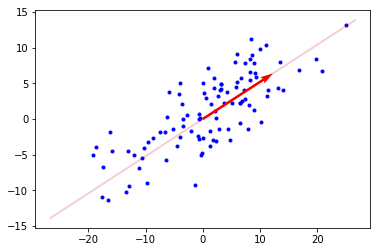

In [66]:
plt.scatter(get_column(B,0), get_column(B,1), marker='.', color='blue')
x = [pc1[0]*i for i in [-30, 1, 30]]
y = [pc1[1]*i for i in [-30, 1, 30]]
plt.plot(x, y, color="#cc000030", linewidth=2)
plt.quiver(pc1[0], pc1[1], angles='xy', scale=4, color='red')
plt.show()

In [67]:
def project(v, w):
    """return the projection of v onto the direction w"""
    projection_length = dot(v, w)
    return scalar_multiply(projection_length, w)

In [68]:
def remove_projection_from_vector(v, w):
    """projects v onto w and subtracts the result from v"""
    return vector_subtract(v, project(v, w))

In [69]:
def remove_projection(X, w):
    """
    for each row of X projects the row onto w, and subtracts the
    result from the row
    """
    return [remove_projection_from_vector(x_i, w) for x_i in X]

In [70]:
C = remove_projection(B, pc1)

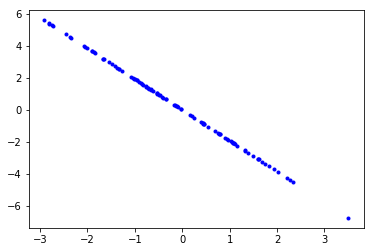

In [71]:
plt.scatter(get_column(C,0), get_column(C,1), marker='.', color='blue')
plt.show()

In [72]:
def principal_components(X, num_components):
    components = []
    for _ in range(num_components):
        component = first_principal_component(X)
        components.append(component)
        X = remove_projection(X, component)
    return components

In [73]:
pcs = principal_components(B, 2)
pcs

[[0.8870329671692456, 0.4617060917455217],
 [-0.4616844058234711, 0.8870442544875812]]

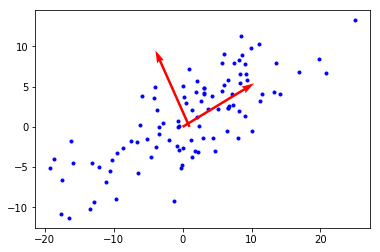

In [74]:
plt.scatter(get_column(B,0), get_column(B,1), marker='.', color='blue')
plt.quiver(get_column(pcs, 0), get_column(pcs, 1), angles='xy', scale=4, color='red')
plt.show()

Reference :
    1. https://github.com/cbare/data-science-from-scratch/blob/master/chapter_10/Working%20with%20data.ipynb